
# PREDICTING FUTURE RECEIPT COUNTS USING FACEBOOK PROPHET 



## Import Libraries and Dataset


In [5]:
!python -m pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 2.9 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [3]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from prophet import Prophet

In [7]:
# dataframes creation for both training and testing datasets 
dataset = pd.read_csv('data_daily.csv')

In [6]:
dataset.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [8]:
dataset.tail()

,# Date,Receipt_Count
360,2021-12-27,10350408
361,2021-12-28,10219445
362,2021-12-29,10313337
363,2021-12-30,10310644
364,2021-12-31,10211187


In [9]:
dataset.describe()

,Receipt_Count
count,3.650000e+02
mean,8.826566e+06
std,7.820089e+05
min,7.095414e+06
25%,8.142874e+06
50%,8.799249e+06
75%,9.476970e+06
max,1.073886e+07


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   # Date         365 non-null    object
 1   Receipt_Count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [11]:
dataset.isnull().sum()

# Date           0
Receipt_Count    0
dtype: int64

## Exploring Dataset 

In [13]:
dataset = dataset.sort_values('# Date')

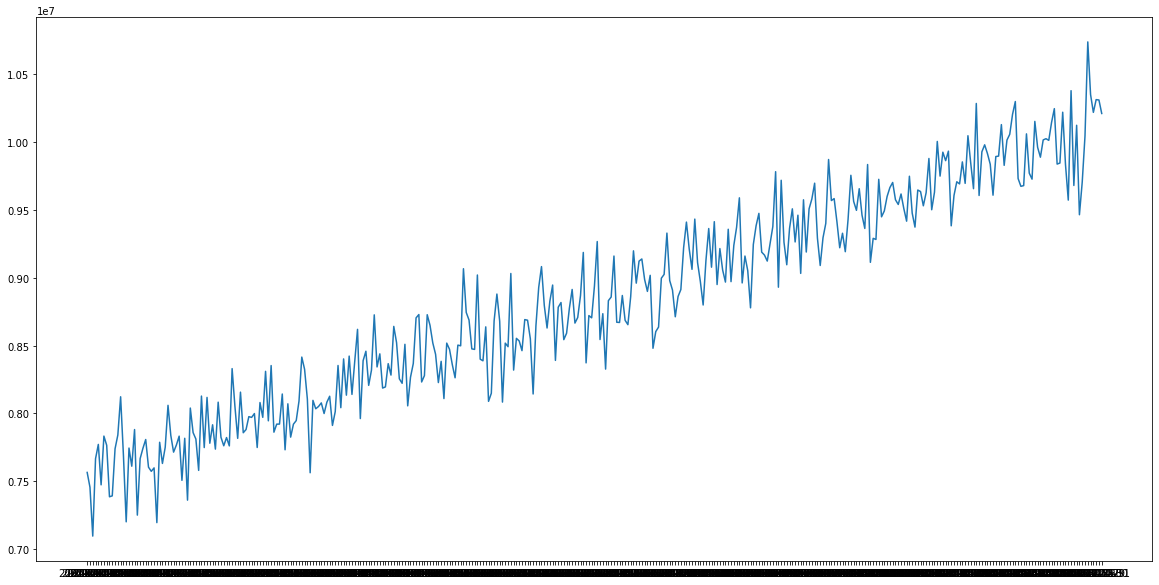

In [14]:
# Plot date and average price
plt.figure(figsize = (20,10))
# plt.xticks(rotation=90)
plt.plot(dataset['# Date'],dataset['Receipt_Count'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


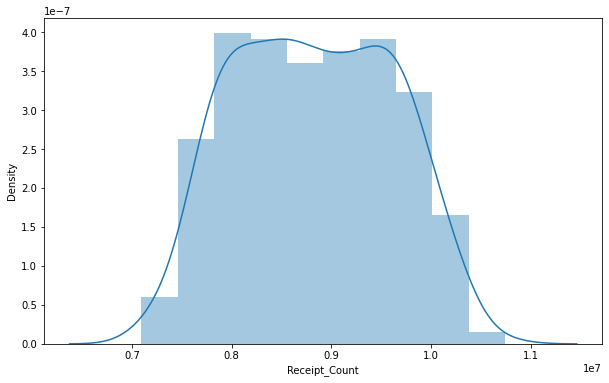

In [15]:
# Plot distribution of the average price
plt.figure(figsize=(10,6))
sns.distplot(dataset['Receipt_Count'])

In [17]:
dataset['# Date'] = pd.to_datetime(dataset['# Date'])
dataset['year'] = dataset['# Date'].dt.year
dataset['month'] = dataset['# Date'].dt.month

## Preparing the data before applying Facebook Prophet tool

In [22]:
# data = dataset.iloc[:,1:3]
dataset.head()

,# Date,Receipt_Count,year,month
0,2021-01-01,7564766,2021,1
1,2021-01-02,7455524,2021,1
2,2021-01-03,7095414,2021,1
3,2021-01-04,7666163,2021,1
4,2021-01-05,7771289,2021,1


In [24]:
data = dataset[['# Date','Receipt_Count']].rename(columns = {'# Date':'ds','Receipt_Count':'y'})
data.head()

,ds,y
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


## Developing Model and making predictions - PART A

In [25]:
fb = Prophet()
fb.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp096js7vc/1plusb71.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp096js7vc/o2n8a61q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3648', 'data', 'file=/tmp/tmp096js7vc/1plusb71.json', 'init=/tmp/tmp096js7vc/o2n8a61q.json', 'output', 'file=/tmp/tmp096js7vc/prophet_model40s3nsbp/prophet_model-20230208140336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:03:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:03:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [26]:
# Forcasting into the future
future = fb.make_future_dataframe(periods=365)
forecast = fb.predict(future)

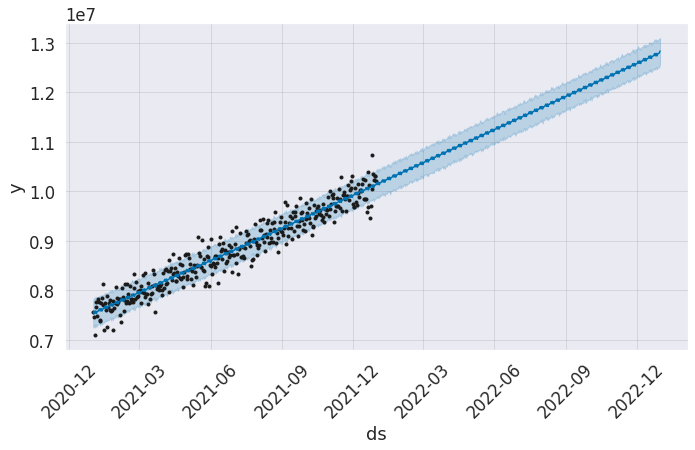

In [27]:
figure = fb.plot(forecast)
# plt.figure(figsize=[25,12])
plt.xlabel="Month"
plt.xticks(rotation = 45)
figure.show()

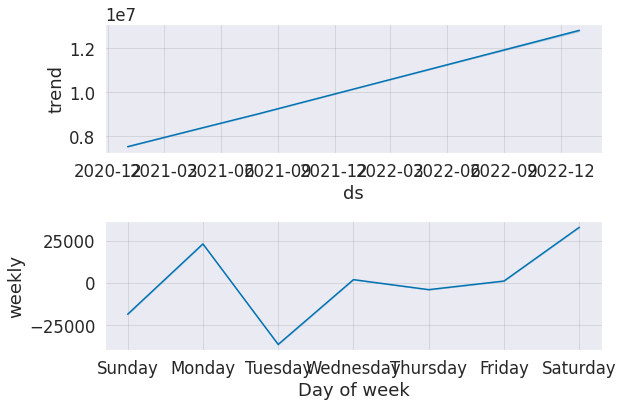

In [28]:
figure2 = fb.plot_components(forecast)

##END